# Word Embeddings + word2vec + gensim 

**Reference:** https://towardsdatascience.com/a-beginners-guide-to-word-embedding-with-gensim-word2vec-model-5970fa56cc92

In [66]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from gensim.models import Word2Vec

In [10]:
df = pd.read_csv('/home/garvit/Datasets/cardataset/data.csv')

In [11]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Data Preprocessing

Create a new column for Make Model

In [12]:
df['Maker_Model'] = df['Make'] + " " + df['Model']

In [34]:
df.head(3)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Maker_Model
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,BMW 1 Series M
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,BMW 1 Series
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,BMW 1 Series


Select features from original dataset to form a new dataframe 


In [13]:
df1 = df[['Engine Fuel Type','Transmission Type','Driven_Wheels','Market Category','Vehicle Size', 'Vehicle Style', 'Maker_Model']]

In [33]:
df1.head(3)

,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style,Maker_Model
0,premium unleaded (required),MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,BMW 1 Series M
1,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible,BMW 1 Series
2,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe,BMW 1 Series


For each row, combine all the columns into one column

In [16]:
df2 = df1.apply(lambda x: ','.join(x.astype(str)), axis=1)

In [35]:
df2.head(3)

0    premium unleaded (required),MANUAL,rear wheel ...
1    premium unleaded (required),MANUAL,rear wheel ...
2    premium unleaded (required),MANUAL,rear wheel ...
dtype: object

Store them in a pandas dataframe


In [27]:
df_clean = pd.DataFrame({'clean': df2})

In [36]:
df_clean.head(3)

,clean
0,"premium unleaded (required),MANUAL,rear wheel ..."
1,"premium unleaded (required),MANUAL,rear wheel ..."
2,"premium unleaded (required),MANUAL,rear wheel ..."


Create the list of list format of the custom corpus for gensim modeling

In [29]:
sent = [row.split(',') for row in df_clean['clean']]

In [41]:
sent[:2]

[['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Factory Tuner',
  'Luxury',
  'High-Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series M'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Convertible',
  'BMW 1 Series']]

## Genism word2vec Model Training

We can train the genism word2vec model with our own custom corpus as following:


In [46]:
model = Word2Vec(sent, min_count=1,size= 50,workers=3, window =3, sg = 1)

**size:** The number of dimensions of the embeddings and the default is 100.

**window:** The maximum distance between a target word and words around the target word. The default window is 5.

**min_count:** The minimum count of words to consider when training the model; words with occurrence less than this count will be ignored. The default for min_count is 5.

**workers:** The number of partitions during training and the default workers is 3.

**sg:** The training algorithm, either CBOW(0) or skip gram(1). The default training algorithm is CBOW.

In [48]:
model['Toyota Camry']

/home/garvit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.09128843,  0.18432972,  0.07927974,  0.02705896,  0.10116894,
       -0.18648936,  0.23474173,  0.31755745,  0.01544541, -0.04411073,
        0.01663701, -0.1157927 , -0.03162438,  0.00281448,  0.06094362,
        0.14235857, -0.13371615, -0.18743788, -0.15537082, -0.08384661,
       -0.10524526,  0.06005198, -0.15401575, -0.02500923, -0.12347835,
       -0.09079804,  0.04766514,  0.16493978,  0.0998091 ,  0.01582159,
        0.1017697 , -0.00609833, -0.26509267,  0.0698917 , -0.07276401,
       -0.04396053, -0.21928883,  0.01516025,  0.21273986,  0.33150607,
       -0.0209433 , -0.17496225, -0.23090747, -0.19363536, -0.24305537,
        0.01601005,  0.06407077, -0.13538529, -0.03462765,  0.04847304],
      dtype=float32)

## Compute Similarities


In [55]:
model.similarity('Porsche 718 Cayman', 'Nissan Van')

/home/garvit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.84266376

In [56]:
model.similarity('Porsche 718 Cayman', 'Mercedes-Benz SLK-Class')

/home/garvit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.9668541

In [58]:
model.most_similar('Mercedes-Benz SLK-Class')[:5]

/home/garvit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('BMW M4', 0.996361255645752),
 ('Maserati Coupe', 0.9945347905158997),
 ('Porsche Cayman', 0.9943538904190063),
 ('Ferrari California', 0.9941116571426392),
 ('Subaru BRZ', 0.9937245845794678)]

## T-SNE Visualizations

/home/garvit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """
/home/garvit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/home/garvit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


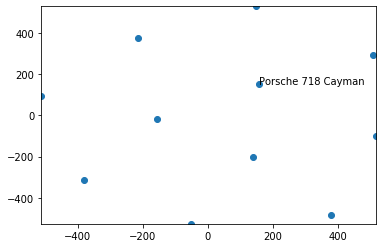

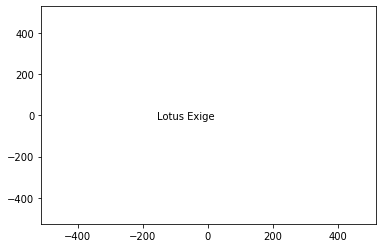

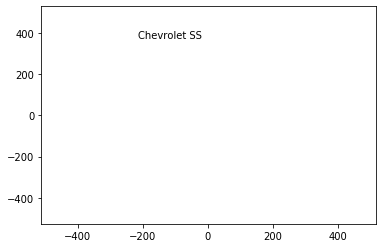

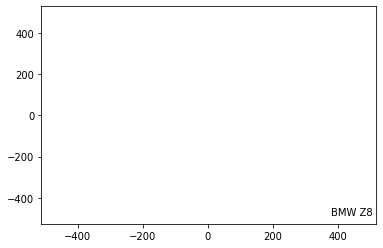

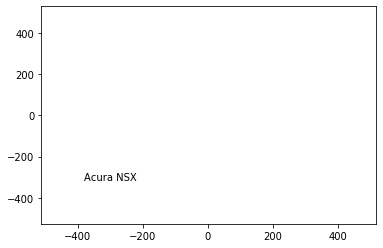

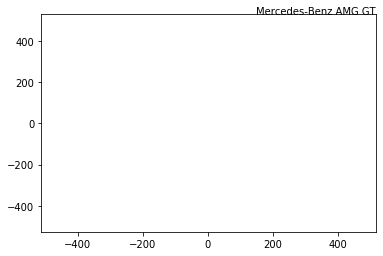

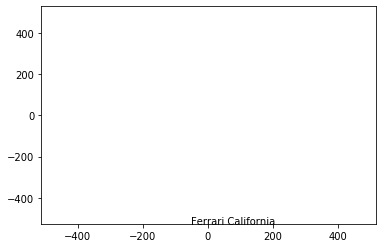

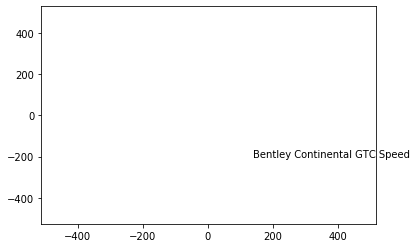

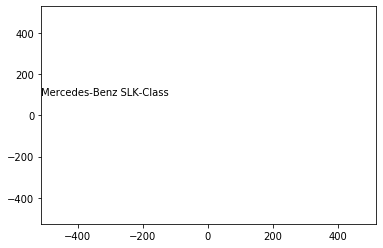

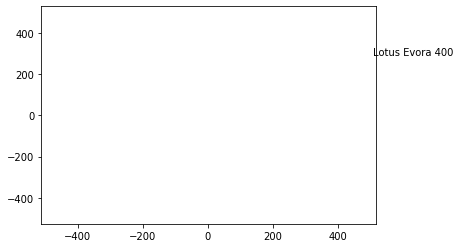

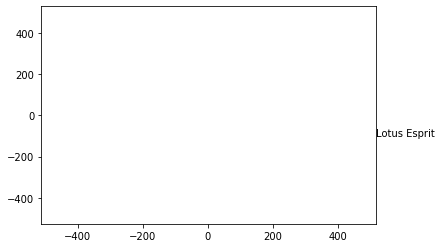

In [67]:
def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]
    close_words = model.similar_by_word(word)
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
            plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
            plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
            plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
            plt.show()

display_closestwords_tsnescatterplot(model, 'Porsche 718 Cayman', 50) 